In [2]:
import feather
import pandas as pd

df = feather.read_dataframe(f"c:/Hackathon_2018/data/raw/minute_sampled_2017/ais_combined_2017_12.feather")

In [28]:
df = feather.read_dataframe(f"c:/Hackathon_2018/data/raw/full_detail_2018_09/aispos/aispos_full_detail.feather")

In [2]:
df[df['Sog']<0].head()
df.shape
df = df[df['Userid']!=0][df['Lon']>7.5][df['Lat']>53][df['Lon']<19.2][df['Lat']<58.653]


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
# Vælg testskibe
import numpy as np
test = list(pd.Series(np.unique(df['Userid'])).sample(n=100, random_state=50))

testdata = df.loc[df['Userid'].isin(test)]
print(testdata.shape)
print(testdata.head())

print(testdata[testdata['Lon']==0])
print(testdata[testdata['Lat']==0])

(1477023, 16)
                Id                 Tid  Aisnum  Repeat     Userid  Status  \
54343  14238928163 2017-12-01 00:01:00       3       0  219000179       5   
54344  14238973742 2017-12-01 00:04:00       3       0  219000179       5   
54345  14239019661 2017-12-01 00:07:00       3       0  219000179       5   
54346  14239065035 2017-12-01 00:10:00       3       0  219000179       5   
54347  14239110843 2017-12-01 00:13:00       3       0  219000179       5   

       Rot  Sog  Posacc   Cog  Thead  Manind     Lon      Lat  Stype  \
54343    0    0       1  1788    182       0  9.7574  55.5602     51   
54344    0    0       1  3522    181       0  9.7574  55.5602     51   
54345    0    0       1  2910    181       0  9.7574  55.5602     51   
54346    0    0       1  2684    182       0  9.7574  55.5602     51   
54347    0    0       1  1926    182       0  9.7574  55.5602     51   

                       Navn  
54343  MHV 909 SPEDITOEREN   
54344  MHV 909 SPEDITOEREN   


In [3]:
from shapely.geometry import Point
import geopandas

geometry = [Point(xy) for xy in zip(testdata.Lon, testdata.Lat)]
# df = df.drop(['Lon', 'Lat'], axis=1)
crs = {'init': 'epsg:4326'}
gdf = geopandas.GeoDataFrame(testdata, crs=crs, geometry=geometry)

NameError: name 'testdata' is not defined

### Havneinstallationer og Esbjerg havn med buffer

In [4]:
url = r'C:\Hackathon_2018\data\geo/'
havn = geopandas.read_file(url +'havn.shp').to_crs({'init': 'epsg:4326'})

tmp = havn[havn['HAVNTYPE'] == 'Kyst']
havn = tmp[tmp['UNDER_MIN'] == 'f']
del(tmp)

havn_sample = havn[havn['FOT_ID']==1113091071]  #.sample(n=1, random_state=4598)

havn_sample['storcirkel'] = havn_sample.buffer(.005)

havn_sample=havn_sample.set_geometry('storcirkel')

havn_sample.geometry.name
havn_sample.shape


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


(1, 14)

### Hent Danmarkskort

In [5]:
url = r'C:\Hackathon_2018\data\geo/NUTS_RG_01M_2016_4326_LEVL_3.geojson'
nuts3 = geopandas.read_file(url)
nuts3_dk = nuts3[nuts3['FID'].isin(['DK032'])]
# nuts3_dk = nuts3[nuts3['CNTR_CODE'].isin(['DK'])]
nuts3_dk2 = nuts3_dk.to_crs({'init': 'epsg:4326'})

nuts3_dk2

,id,CNTR_CODE,NUTS_NAME,LEVL_CODE,FID,NUTS_ID,geometry
584,DK032,DK,Sydjylland,3,DK032,DK032,"(POLYGON ((9.38701 55.92415, 9.3887 55.9211400..."


Procestiden har været 1 minutter og 21.96 sekunder.


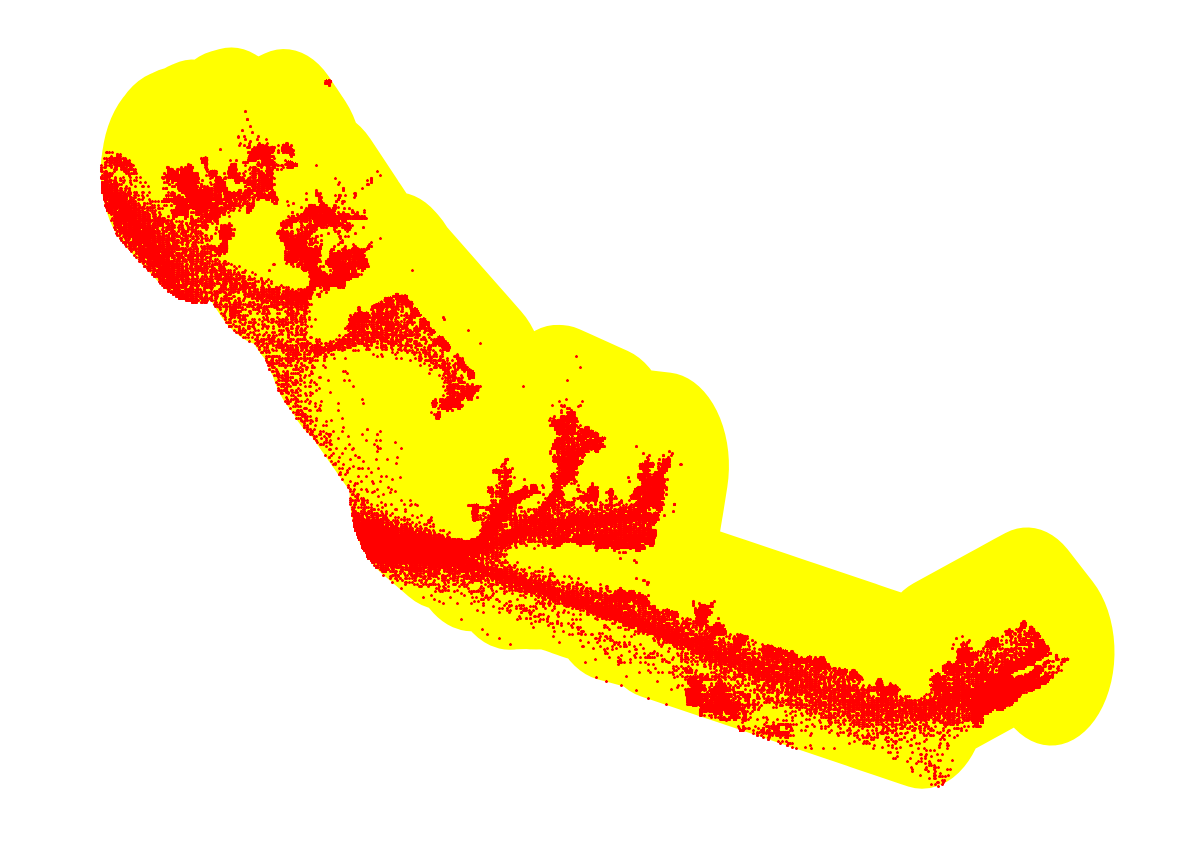

In [55]:
import geopandas
from matplotlib import pyplot as plt
import time
t0 = time.time()

fig, ax = plt.subplots(figsize=(20,15))
# nuts3_dk2.plot(ax=ax, color='Lightgreen')

havn_sample.plot(ax=ax, color="Yellow")
# havn2.plot(ax=ax, color="Blue")

# gdf.plot(ax=ax, column='Userid', markersize=2, marker='*', color="Red")

# gdf_esbjerg.plot(ax=ax, column='Userid', markersize=2, marker='*')
in_port2.plot(ax=ax, markersize=5, marker='*', color="Red")
ax.set_axis_off()

# ax.set_title('Skibe. September 2018', loc='center',
#              fontdict={'family': 'Times New Roman', 'fontsize': '20', 'fontweight': 3})
fig.savefig("Esbjerg.png")

t1 = time.time()
dt = t1 - t0
print("Procestiden har været {} minutter og {} sekunder.".format(int(dt / 60), round(dt%60, 2)))

In [41]:
df_esbjerg = df[df['Userid']!=0][df['Lon']>8.3002][df['Lat']>55.4132][df['Lon']<8.5615][df['Lat']<55.5418].reset_index(drop=True)

print (df_esbjerg.shape)
print(df_esbjerg.head())

geometry = [Point(xy) for xy in zip(df_esbjerg.Lon, df_esbjerg.Lat)]
# df = df.drop(['Lon', 'Lat'], axis=1)
crs = {'init': 'epsg:4326'}
gdf_esbjerg = geopandas.GeoDataFrame(df_esbjerg, crs=crs, geometry=geometry)


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(3808716, 16)
            Id                 Tid  Aisnum  Repeat   Userid  Status  Rot  Sog  \
0  14238916187 2017-12-01 00:00:00       1       0  2190045      15  128    0   
1  14238923698 2017-12-01 00:01:00       1       0  2190045      15  128    0   
2  14238939086 2017-12-01 00:02:00       1       0  2190045      15  128    0   
3  14238954392 2017-12-01 00:03:00       1       0  2190045      15  128    0   
4  14238969703 2017-12-01 00:04:00       1       0  2190045      15  128    0   

   Posacc   Cog  Thead  Manind     Lon      Lat  Stype                  Navn  
0       0  2179    511       0  8.4233  55.4718     10  ESBJERG HARBOUR       
1       0  2456    511       0  8.4233  55.4718     10  ESBJERG HARBOUR       
2       0  3116    511       0  8.4233  55.4718     10  ESBJERG HARBOUR       
3       0  2599    511       0  8.4233  55.4718     10  ESBJERG HARBOUR       
4       0  2976    511       0  8.4234  55.4718     10  ESBJERG HARBOUR       


In [149]:
geohavn = pd.read_csv(r'C:\Hackathon_2018\data\havne/statistiske havne dk.csv')
geohavn.head()

,country,mca,unLocode,name,nuts3,lon,lat,flon,flat,geometry
0,DK,DK00,DKAAB,Aabenraa,DK032,9.417580,55.035686,9.417580,55.035686,POINT (9.417579651 55.03568649)
1,DK,DK00,DKAAL,Aalborg,DK050,9.916667,57.050000,9.916667,57.050000,POINT (9.916666666999999 57.05)
2,DK,DK00,DKAAR,Arhus,DK042,10.222687,56.141490,10.222687,56.141490,POINT (10.22268716 56.1414896)
3,DK,DK00,DKAGH,Agger Havn,DK050,8.250000,56.783333,8.250000,56.783333,POINT (8.25 56.78333333)
4,DK,DK00,DKAGO,Agerso,DK022,11.196606,55.216454,11.196606,55.216454,POINT (11.19660557 55.216454)


In [52]:
from geopandas.tools import sjoin

in_port = sjoin(left_df=gdf_esbjerg, right_df=havn_sample, how=('inner'))

# gdf_esbjerg.reset_index(inplace=True, drop=True)
# tf = gdf_esbjerg.within(havn_sample)
# in_port = gdf_esbjerg[tf]


# print (in_port[in_port==True])


# print (havn_sample.head())

# gdf_esbjerg.within(havn2)==True

In [53]:
geometry = [Point(xy) for xy in zip(in_port.Lon, in_port.Lat)]
# df = df.drop(['Lon', 'Lat'], axis=1)
crs = {'init': 'epsg:4326'}
in_port2 = geopandas.GeoDataFrame(in_port, crs=crs, geometry=geometry)


In [80]:
import datetime

in_port3 = in_port2.drop_duplicates(subset=['Userid', in_port2['Tid'].timetuple().tm_yday], keep='first')
in_port3.shape

TypeError: cannot convert the series to <class 'int'>

In [116]:
import time
from datetime import datetime
import pandas as pd
# print(in_port2['Tid'].apply(lambda x: pd.to_datetime(x).to_period('D')))
print(in_port2['Tid'].describe())

print(np.datetime64('2012-05-01T01:00:00.000000'))

# pandas.Timestamp(numpy.datetime64('2012-05-01T01:00:00.000000')).dayofyear

ts = pd.Timestamp(in_port2['Tid']).dayofyear

print(ts.describe())
print(ts.head())

# test = pd.to_datetime(in_port2['Tid'])
# print(test.describe())
# print(test.head())

count                 3720313
unique                  43811
top       2017-12-07 00:00:00
freq                      171
first     2017-12-01 00:00:00
last      2018-01-01 00:00:00
Name: Tid, dtype: object
2012-05-01T01:00:00.000000


TypeError: Cannot convert input [0         2017-12-01 00:00:00
1         2017-12-01 00:01:00
2         2017-12-01 00:02:00
3         2017-12-01 00:03:00
4         2017-12-01 00:04:00
5         2017-12-01 00:05:00
6         2017-12-01 00:06:00
7         2017-12-01 00:07:00
8         2017-12-01 00:08:00
9         2017-12-01 00:09:00
10        2017-12-01 00:10:00
11        2017-12-01 00:11:00
12        2017-12-01 00:12:00
13        2017-12-01 00:13:00
14        2017-12-01 00:14:00
15        2017-12-01 00:15:00
16        2017-12-01 00:16:00
17        2017-12-01 00:17:00
18        2017-12-01 00:18:00
19        2017-12-01 00:19:00
20        2017-12-01 00:20:00
21        2017-12-01 00:21:00
22        2017-12-01 00:22:00
23        2017-12-01 00:23:00
24        2017-12-01 00:24:00
25        2017-12-01 00:25:00
26        2017-12-01 00:26:00
27        2017-12-01 00:27:00
28        2017-12-01 00:28:00
29        2017-12-01 00:29:00
                  ...        
3808686   2017-12-31 22:31:00
3808687   2017-12-31 22:34:00
3808688   2017-12-31 22:37:00
3808689   2017-12-31 22:40:00
3808690   2017-12-31 22:43:00
3808691   2017-12-31 22:46:00
3808692   2017-12-31 22:49:00
3808693   2017-12-31 22:52:00
3808694   2017-12-31 22:55:00
3808695   2017-12-31 22:58:00
3808696   2017-12-31 23:01:00
3808697   2017-12-31 23:04:00
3808698   2017-12-31 23:07:00
3808699   2017-12-31 23:10:00
3808700   2017-12-31 23:13:00
3808701   2017-12-31 23:16:00
3808702   2017-12-31 23:19:00
3808703   2017-12-31 23:22:00
3808704   2017-12-31 23:25:00
3808705   2017-12-31 23:28:00
3808706   2017-12-31 23:31:00
3808707   2017-12-31 23:34:00
3808708   2017-12-31 23:37:00
3808709   2017-12-31 23:40:00
3808710   2017-12-31 23:43:00
3808711   2017-12-31 23:46:00
3808712   2017-12-31 23:49:00
3808713   2017-12-31 23:52:00
3808714   2017-12-31 23:55:00
3808715   2017-12-31 23:58:00
Name: Tid, Length: 3720313, dtype: datetime64[ns]] of type <class 'pandas.core.series.Series'> to Timestamp

In [81]:
import numpy as np
print(type(in_port))
print(in_port.shape)
print(in_port.head())
print(in_port[in_port['FOT_ID']!=1113091071].head())

in_port = in_port[in_port['FOT_ID']==1113091071]

print(in_port2.Tid.describe)

<class 'pandas.core.frame.DataFrame'>
(3720313, 32)
            Id                 Tid  Aisnum  Repeat   Userid  Status  Rot  Sog  \
0  14238916187 2017-12-01 00:00:00       1       0  2190045      15  128    0   
1  14238923698 2017-12-01 00:01:00       1       0  2190045      15  128    0   
2  14238939086 2017-12-01 00:02:00       1       0  2190045      15  128    0   
3  14238954392 2017-12-01 00:03:00       1       0  2190045      15  128    0   
4  14238969703 2017-12-01 00:04:00       1       0  2190045      15  128    0   

   Posacc   Cog                ...                    FEATSTATUS  GEOMSTATUS  \
0       0  2179                ...                  Taget i brug     Endelig   
1       0  2456                ...                  Taget i brug     Endelig   
2       0  3116                ...                  Taget i brug     Endelig   
3       0  2599                ...                  Taget i brug     Endelig   
4       0  2976                ...                  Taget i b

In [38]:
print(tf.head())
print(tf.shape)
print(in_port.shape)
print (in_port.head())

print(type(in_port))

tf.sum()


0    False
1    False
2    False
3    False
4    False
dtype: bool
(3808716,)
(1, 19)
      index  index_left           Id                 Tid  Aisnum  Repeat  \
3266   3266       75868  14244819631 2017-12-01 06:23:00       3       0   

         Userid  Status  Rot  Sog  Posacc  Cog  Thead  Manind     Lon  \
3266  219000603       0    0    0       1    0      4       0  8.4419   

          Lat  Stype                  Navn                geometry  
3266  55.4615      6  MENJA   @@@@@@@@@@@@  POINT (8.4419 55.4615)  
<class 'geopandas.geodataframe.GeoDataFrame'>


1